In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
# Read hyperopt data
lines_start = 4135
lines_end = -1
df = pd.read_csv("../results/hyperopt.csv").iloc[lines_start:lines_end]

# Baseline
df_baseline = pd.read_csv("../results/data.csv")
df_baseline["adapter"] = df_baseline["adapter"].fillna("no_adapter")

df.head(5)

,dataset,model,adapter,n_features,n_components,context_length,forecasting_horizon,num_layers,hidden_dim,learning_rate,...,test_mse,test_mae,num_coupling,scaled_mse,scaled_mae,test_scaled_mse,test_scaled_mae,use_revin,beta,train_size
4135,Illness_pred=24,AutonLab/MOMENT-1-small,flow,7.0,7.0,512.0,24.0,NaN,128.0,0.001,...,4.631161,1.439878,2.0,1.417450,0.915557,4.559346,1.443506,False,NaN,NaN
4136,Illness_pred=24,AutonLab/MOMENT-1-small,flow,7.0,7.0,512.0,24.0,NaN,256.0,0.001,...,5.106150,1.563980,1.0,1.107222,0.806023,5.091413,1.574175,False,NaN,NaN
4137,Illness_pred=24,AutonLab/MOMENT-1-small,flow,7.0,7.0,512.0,24.0,NaN,64.0,0.001,...,5.582616,1.665431,3.0,1.318521,0.878625,5.598715,1.679468,True,NaN,NaN
4138,Illness_pred=24,AutonLab/MOMENT-1-small,flow,7.0,7.0,512.0,24.0,NaN,128.0,0.001,...,5.642131,1.699702,2.0,1.431926,0.945989,5.626446,1.710713,True,NaN,NaN
4139,Illness_pred=24,AutonLab/MOMENT-1-small,flow,7.0,7.0,512.0,24.0,NaN,128.0,0.001,...,5.623275,1.773968,2.0,1.459336,0.937202,5.634658,1.787329,True,NaN,NaN


In [7]:
forecasting_horizon = 96
dataset_name = "ExchangeRate" + f"_pred={forecasting_horizon}"
model_name = "AutonLab/MOMENT-1-small"
adapter = "AEflow"
n_components = 8
hypers = [
    "hidden_dim",
    # "learning_rate",
    # "batch_size",
    "num_coupling",
    # "num_layers",
    "use_revin",
    # "beta",
]

df_sub = df[
    (df["dataset"] == dataset_name)
    & (df["model"] == model_name)
    & (df["adapter"] == adapter)
    & (df["n_components"] == n_components)
]
df_baseline_sub = df_baseline[
    (df_baseline["dataset"] == dataset_name.split("_")[0])
    & (df_baseline["foundational_model"] == model_name)
    & (df_baseline["is_fine_tuned"].isin(["False"]))
    & (df_baseline["adapter"] == "no_adapter")
]

df_sub.head(5)

,dataset,model,adapter,n_features,n_components,context_length,forecasting_horizon,num_layers,hidden_dim,learning_rate,...,test_mse,test_mae,num_coupling,scaled_mse,scaled_mae,test_scaled_mse,test_scaled_mae,use_revin,beta,train_size
4406,ExchangeRate_pred=96,AutonLab/MOMENT-1-small,AEflow,8.0,8.0,512.0,96.0,NaN,128.0,0.001,...,0.483464,0.540847,2.0,0.349399,0.438274,0.362439,0.476173,False,NaN,500.0
4407,ExchangeRate_pred=96,AutonLab/MOMENT-1-small,AEflow,8.0,8.0,512.0,96.0,NaN,128.0,0.001,...,0.508931,0.550219,2.0,0.408729,0.477958,0.386507,0.486694,False,NaN,500.0
4408,ExchangeRate_pred=96,AutonLab/MOMENT-1-small,AEflow,8.0,8.0,512.0,96.0,NaN,128.0,0.001,...,0.395136,0.482789,3.0,0.378761,0.465939,0.295486,0.422763,False,NaN,500.0
4409,ExchangeRate_pred=96,AutonLab/MOMENT-1-small,AEflow,8.0,8.0,512.0,96.0,NaN,128.0,0.001,...,0.436418,0.497095,3.0,0.366963,0.460343,0.309359,0.426445,False,NaN,500.0
4410,ExchangeRate_pred=96,AutonLab/MOMENT-1-small,AEflow,8.0,8.0,512.0,96.0,NaN,64.0,0.001,...,0.568784,0.573246,2.0,0.442849,0.486092,0.381570,0.480882,True,NaN,500.0


In [8]:
df_baseline_clean = df_baseline_sub.drop(
    columns=[
        "dataset",
        "foundational_model",
        "adapter",
        "n_features",
        "forecasting_horizon",
        "n_components",
        "context_length",
        "is_fine_tuned",
    ],
    inplace=False,
)
df_clean = df_sub.drop(
    columns=[
        "dataset",
        "model",
        "adapter",
        "n_features",
        "forecasting_horizon",
        "n_components",
        "context_length",
    ],
    inplace=False,
)
df_clean = df_clean.loc[:, df_clean.nunique() != 1]
df_clean = df_clean.dropna(axis=1, how="all")
df_clean = df_clean.loc[:, ~df_clean.columns.str.contains("scaled")]
df_clean = df_clean.dropna()
df_clean.head(5)

,hidden_dim,running_time,mse,mae,test_mse,test_mae,num_coupling,use_revin
4406,128.0,4019.747727,0.442475,0.496404,0.483464,0.540847,2.0,False
4407,128.0,4082.443344,0.512110,0.535400,0.508931,0.550219,2.0,False
4408,128.0,4109.558765,0.469739,0.518621,0.395136,0.482789,3.0,False
4409,128.0,4084.572744,0.486371,0.529696,0.436418,0.497095,3.0,False
4410,64.0,4080.987818,0.552788,0.548566,0.568784,0.573246,2.0,True


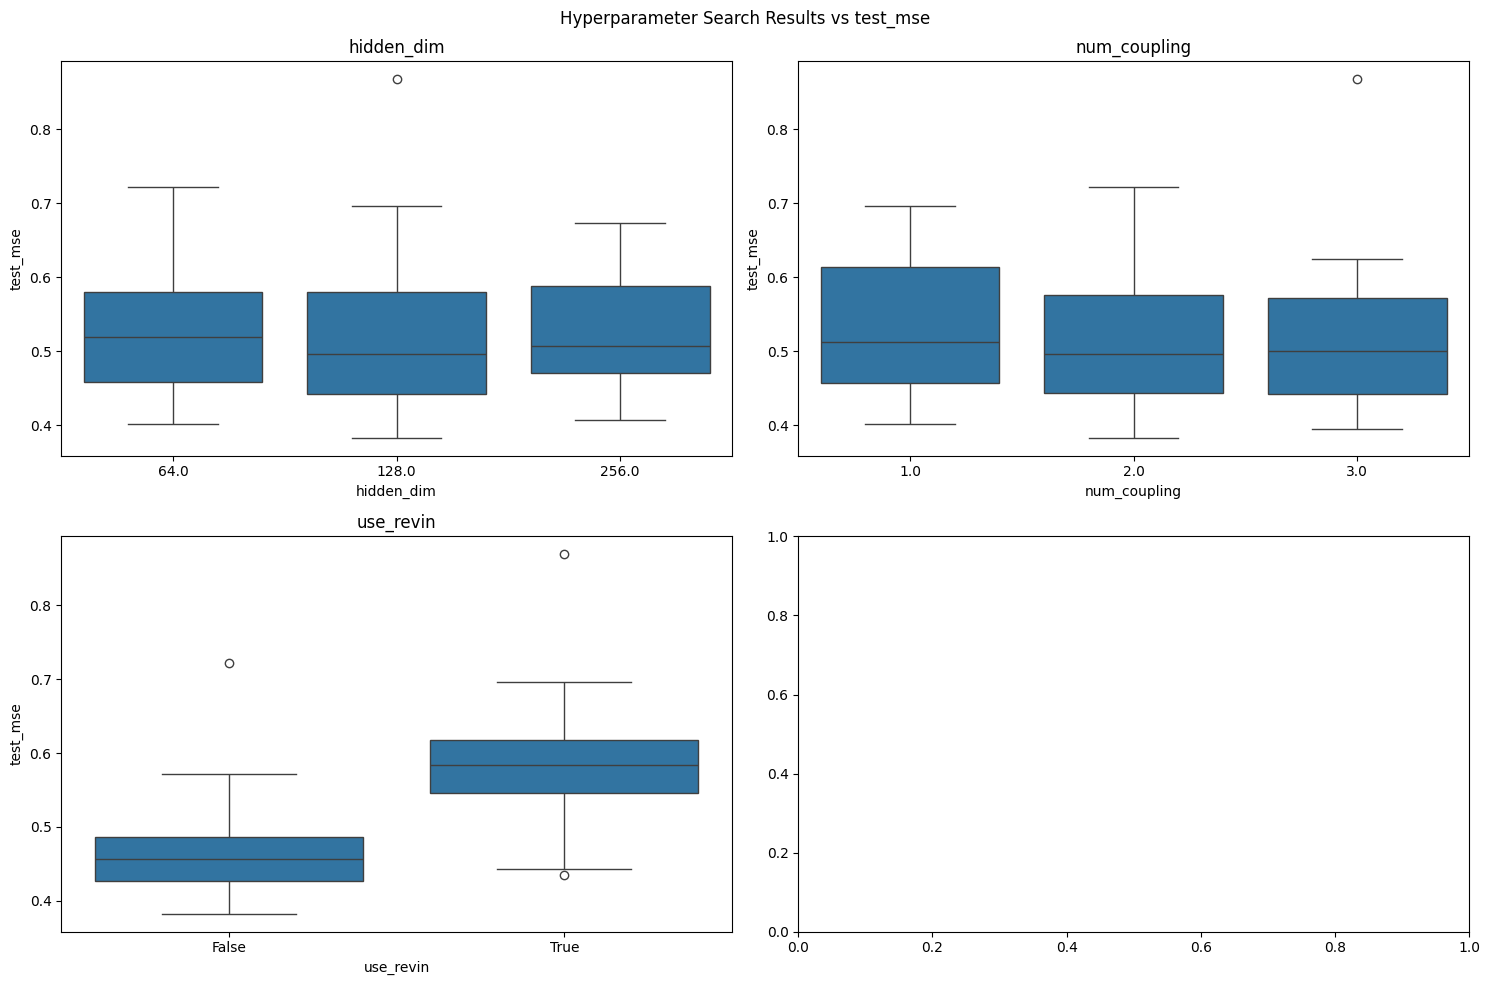

In [9]:
metric = "test_mse"

# Create subplots for each hyperparameter
fig, axes = plt.subplots(len(hypers) // 2 + len(hypers) % 2, 2, figsize=(15, 10))
axes = axes.flatten()
fig.suptitle(f"Hyperparameter Search Results vs {metric}")

for i, hyper in enumerate(hypers):
    if hyper in df_clean.columns:
        sns.boxplot(data=df_clean, x=hyper, y=metric, ax=axes[i])
    axes[i].set_title(hyper)

plt.tight_layout()
plt.show()

In [10]:
# Group by the hyperparameters and calculate mean and std for each metric
grouped_df = df_clean.groupby(hypers).agg(["mean", "std", "count"])

# Flatten the MultiIndex columns
grouped_df.columns = ["_".join(col).strip() for col in grouped_df.columns.values]

grouped_df.reset_index(inplace=True)

[metric: mse]
hidden_dim       64.0
num_coupling      1.0
use_revin       False
Name: 0, dtype: object
 0.44365301659863743+-0.021936122223649362  
---

[metric: mae]
hidden_dim       64.0
num_coupling      3.0
use_revin       False
Name: 4, dtype: object
 0.4928503945911217+-0.02656893288558692  
---

[metric: test_mse]
hidden_dim      256.0
num_coupling      2.0
use_revin       False
Name: 14, dtype: object
 0.4390151903535312+-0.012767995101806364  
---

baseline(test_mse): 0.43654130732871854 +- 0.0027409981145329514
[metric: test_mae]
hidden_dim      256.0
num_coupling      2.0
use_revin       False
Name: 14, dtype: object
 0.4390151903535312+-0.012767995101806364  
---

baseline(test_mae): 0.49937705471311233 +- 0.0016342924044485856


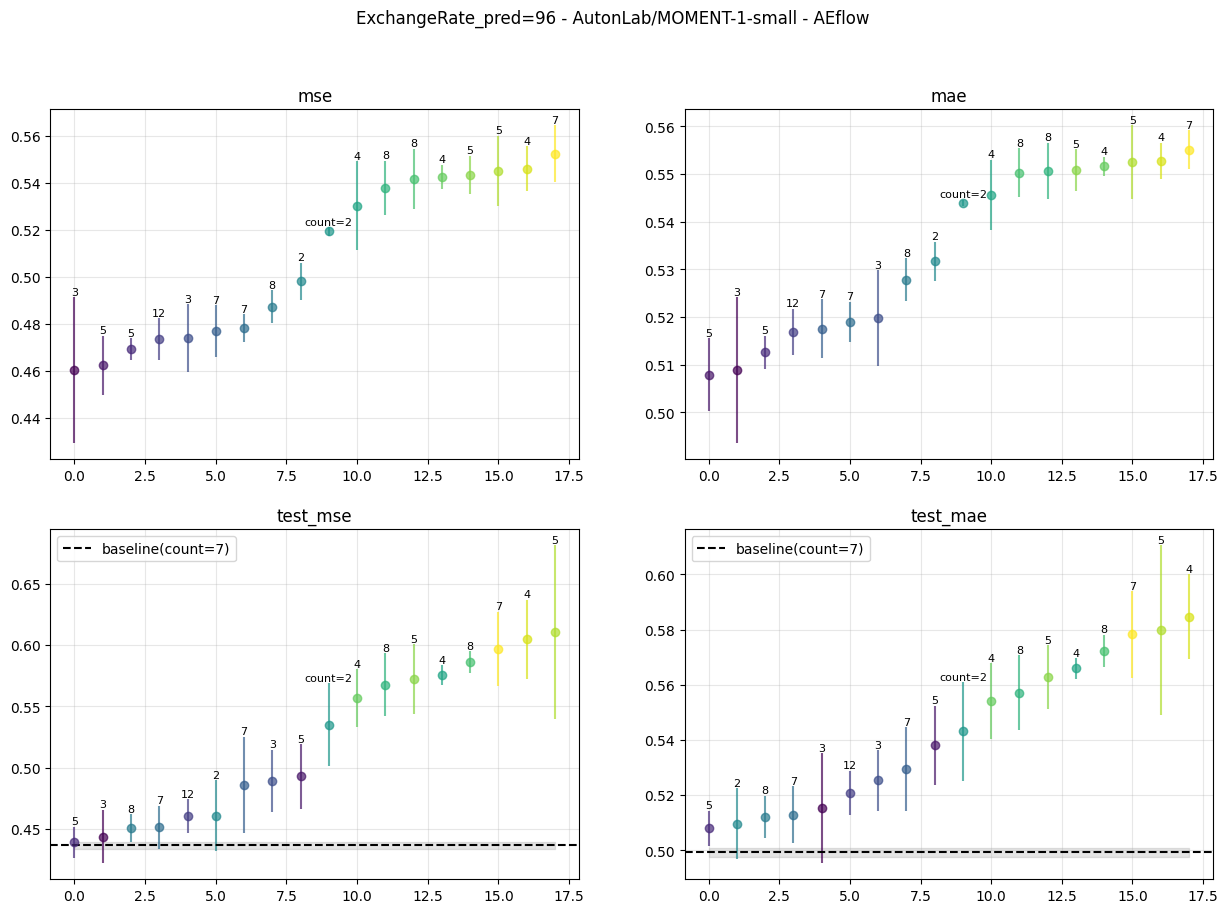

In [12]:
top_k = 100
metrics = ["mse", "mae", "test_mse", "test_mae"]
fig, axes = plt.subplots(len(metrics) // 2, 2, figsize=(15, 10))
fig.suptitle(f"{dataset_name} - {model_name} - {adapter}")
axes = axes.flatten()

# Create a color map based on initial rankings for mse
num_configs = len(grouped_df)
colors = plt.cm.viridis(np.linspace(0, 1, num_configs))

# Get initial ranking order based on mse
initial_order = grouped_df.sort_values(by="mse_mean").index
color_dict = dict(zip(initial_order, colors))

for i, metric in enumerate(metrics):
    # Sort by the specified metric mean
    sorted_df = grouped_df.sort_values(by=f"{metric}_mean", ascending=True)
    # Keep only top 12 configurations
    sorted_df = sorted_df.head(top_k)

    print(
        f"[metric: {metric}]\n{sorted_df.iloc[0][hypers]}\n {sorted_df.iloc[0]['test_mse_mean']}+-{sorted_df.iloc[0]['test_mse_std'] / np.sqrt(sorted_df.iloc[0]['test_mse_count'])}  \n---\n"
    )

    # Plot points with error bars using consistent colors
    size = len(sorted_df)
    for idx, row in sorted_df.iterrows():
        axes[i].errorbar(
            x=sorted_df.index.get_loc(idx),
            y=row[f"{metric}_mean"],
            yerr=row[f"{metric}_std"] / np.sqrt(row[f"{metric}_count"]),
            fmt="o",
            color=color_dict[idx],
            alpha=0.7,
        )
        ct = int(row[f"{metric}_count"])
        axes[i].text(
            sorted_df.index.get_loc(idx),
            row[f"{metric}_mean"]
            + row[f"{metric}_std"] / np.sqrt(row[f"{metric}_count"]),
            f"count={ct}" if idx == size - 1 else str(ct),
            fontsize=8,
            ha="center",
            va="bottom",
        )

    # baseline
    if "test" in metric:
        values = df_baseline_clean.loc[df_baseline_clean["metric"] == metric[5:]][
            "value"
        ]
        baseline = values.mean()
        baseline_std = values.std()
        print(
            f"baseline({metric}): {baseline} +- {baseline_std / np.sqrt(len(values))}"
        )
        x_range = [0, len(sorted_df) - 1]
        axes[i].axhline(
            y=baseline,
            color="black",
            linestyle="--",
            label=f"baseline(count={len(values)})",
        )
        axes[i].fill_between(
            x_range,
            [baseline - baseline_std / np.sqrt(len(values))],
            [baseline + baseline_std / np.sqrt(len(values))],
            color="black",
            alpha=0.1,
        )
        axes[i].legend()

    axes[i].set_title(metric)
    axes[i].grid(True, alpha=0.3)
plt.show()

In [10]:
from dicl.utils.main_script import prepare_data

In [11]:
X_train, y_train, X_val, y_val, X_test, y_test, n_features = prepare_data(
    dataset_name="Illness_pred=24", context_length=512, forecasting_horizon=24
)
print(
    f"Illness_pred=24, size: {X_train.shape}, val size {X_val.shape}, test size {X_test.shape}"
)

Illness_pred=24, size: (141, 7, 512), val size (74, 7, 512), test size (170, 7, 512)


In [13]:
X_train, y_train, X_val, y_val, X_test, y_test, n_features = prepare_data(
    dataset_name="ETTh1_pred=96", context_length=512, forecasting_horizon=96
)
print(
    f"ETTh1_pred=96, size: {X_train.shape}, val size {X_val.shape}, test size {X_test.shape}"
)

ETTh1_pred=96, size: (8033, 7, 512), val size (2785, 7, 512), test size (2785, 7, 512)


In [14]:
X_train, y_train, X_val, y_val, X_test, y_test, n_features = prepare_data(
    dataset_name="Weather_pred=96", context_length=512, forecasting_horizon=96
)
print(
    f"Weather_pred=96, size: {X_train.shape}, val size {X_val.shape}, test size {X_test.shape}"
)

Weather_pred=96, size: (36280, 21, 512), val size (5175, 21, 512), test size (10444, 21, 512)


In [15]:
X_train, y_train, X_val, y_val, X_test, y_test, n_features = prepare_data(
    dataset_name="ExchangeRate_pred=96", context_length=512, forecasting_horizon=96
)
print(
    f"ExchangeRate_pred=96, size: {X_train.shape}, val size {X_val.shape}, test size {X_test.shape}"
)

ExchangeRate_pred=96, size: (4704, 8, 512), val size (665, 8, 512), test size (1422, 8, 512)


In [16]:
X_train, y_train, X_val, y_val, X_test, y_test, n_features = prepare_data(
    dataset_name="ETTh2_pred=96", context_length=512, forecasting_horizon=96
)
print(
    f"ETTh2_pred=96, size: {X_train.shape}, val size {X_val.shape}, test size {X_test.shape}"
)

ETTh2_pred=96, size: (8033, 7, 512), val size (2785, 7, 512), test size (2785, 7, 512)


In [17]:
X_train, y_train, X_val, y_val, X_test, y_test, n_features = prepare_data(
    dataset_name="ETTm1_pred=96", context_length=512, forecasting_horizon=96
)
print(
    f"ETTm1_pred=96, size: {X_train.shape}, val size {X_val.shape}, test size {X_test.shape}"
)

ETTm1_pred=96, size: (33953, 7, 512), val size (11425, 7, 512), test size (11425, 7, 512)


In [18]:
X_train, y_train, X_val, y_val, X_test, y_test, n_features = prepare_data(
    dataset_name="Traffic_pred=96", context_length=512, forecasting_horizon=96
)
print(
    f"Traffic_pred=96, size: {X_train.shape}, val size {X_val.shape}, test size {X_test.shape}"
)

Traffic_pred=96, size: (11673, 862, 512), val size (1661, 862, 512), test size (3413, 862, 512)
